In [2]:
import os
import pandas as pd
filepath = r'C:\Users\wendy.c\Desktop\python\資料清單'
data = []
for root, dirs, files in os.walk(filepath):
    print('root:', root)
    print('dirs:', dirs)
    print('files:', files)# 顯示檔案列表
    for file in files:
        with open('{}\{}'.format(root,file)) as f:
            l = list(map(lambda x:x.replace(',\n',''), f.readlines()))
        df0 = pd.read_csv(StringIO('\n'.join(l)), index_col = ['日期'])
        data.append(df0)
df = pd.concat(data)
df

root: C:\Users\wendy.c\Desktop\python\資料清單
dirs: ['.ipynb_checkpoints']
files: ['20230101_20230131.csv', '20230201_20230228.csv', '20230301_20230331.csv', '20230401_20230430.csv', '20230501_20230531.csv', '20230601_20230630.csv', '20230701_20230731.csv', '20230801_20230831.csv', '20230901_20230930.csv', '20231001_20231031.csv', '20231101_20231130.csv', '20231201_20231231.csv']


NameError: name 'StringIO' is not defined

In [6]:
filepath = r'C:\Users\wendy.c\Desktop\python\資料清單\20230101_20230131.csv'
df = pd.read_csv(filepath, encoding = 'big5')
df
#日期跟欄位對不起來

,日期,賣權成交量,買權成交量,買賣權成交量比率%,賣權未平倉量,買權未平倉量,買賣權未平倉量比率%
2023/01/31,273744,330999,82.70,138214,170220,81.20,NaN
2023/01/30,349525,410532,85.14,89495,87502,102.28,NaN
2023/01/17,142037,147777,96.12,200645,191808,104.61,NaN
2023/01/16,195256,200493,97.39,189684,180133,105.30,NaN
2023/01/13,261440,305050,85.70,176152,175608,100.31,NaN
2023/01/12,147592,164753,89.58,161427,160363,100.66,NaN
2023/01/11,553048,555559,99.55,142750,131979,108.16,NaN
2023/01/10,479056,469606,102.01,301387,227327,132.58,NaN
2023/01/09,596922,484056,123.32,276672,193739,142.81,NaN
2023/01/06,285047,262552,108.57,214223,197219,108.62,NaN


In [45]:
import pandas as pd

with open(filepath) as f:
    rows = f.readlines()
data1 = []
for row in rows:
    #拿掉最尾巴的,
    #print(row.replace(',\n',''))
    #轉換為df
    data2 = row.replace(',\n','').split(',')
    data1.append(data2)

df = pd.DataFrame(data1)
df.columns = df.loc[0]
df.drop([0])

,日期,賣權成交量,買權成交量,買賣權成交量比率%,賣權未平倉量,買權未平倉量,買賣權未平倉量比率%\n
1,2023/01/31,273744,330999,82.70,138214,170220,81.20
2,2023/01/30,349525,410532,85.14,89495,87502,102.28
3,2023/01/17,142037,147777,96.12,200645,191808,104.61
4,2023/01/16,195256,200493,97.39,189684,180133,105.30
5,2023/01/13,261440,305050,85.70,176152,175608,100.31
6,2023/01/12,147592,164753,89.58,161427,160363,100.66
7,2023/01/11,553048,555559,99.55,142750,131979,108.16
8,2023/01/10,479056,469606,102.01,301387,227327,132.58
9,2023/01/09,596922,484056,123.32,276672,193739,142.81
10,2023/01/06,285047,262552,108.57,214223,197219,108.62


In [50]:
import pandas as pd
from io import StringIO

data = []
with open(filepath) as f:
    rows = f.readlines()
    
for row in rows:
    data.append(row.replace(',\n',''))
    
pd.read_csv(StringIO('\n'.join(data)),parse_dates = ['日期'],index_col = ['日期'])
#pd.read_csv(StringIO('\n'.join(data)))

,賣權成交量,買權成交量,買賣權成交量比率%,賣權未平倉量,買權未平倉量,買賣權未平倉量比率%
日期,,,,,,
2023-01-31,273744,330999,82.70,138214,170220,81.20
2023-01-30,349525,410532,85.14,89495,87502,102.28
2023-01-17,142037,147777,96.12,200645,191808,104.61
2023-01-16,195256,200493,97.39,189684,180133,105.30
2023-01-13,261440,305050,85.70,176152,175608,100.31
2023-01-12,147592,164753,89.58,161427,160363,100.66
2023-01-11,553048,555559,99.55,142750,131979,108.16
2023-01-10,479056,469606,102.01,301387,227327,132.58
2023-01-09,596922,484056,123.32,276672,193739,142.81


In [24]:
import pandas as pd
from io import StringIO

data = list(map(lambda x: x.replace(',\n',''),open(filepath).readlines()))

    
pd.read_csv(StringIO('\n'.join(data)),parse_dates = ['日期'],index_col = ['日期'])
#pd.read_csv(StringIO('\n'.join(data)))

,賣權成交量,買權成交量,買賣權成交量比率%,賣權未平倉量,買權未平倉量,買賣權未平倉量比率%
日期,,,,,,
2023-01-31,273744,330999,82.70,138214,170220,81.20
2023-01-30,349525,410532,85.14,89495,87502,102.28
2023-01-17,142037,147777,96.12,200645,191808,104.61
2023-01-16,195256,200493,97.39,189684,180133,105.30
2023-01-13,261440,305050,85.70,176152,175608,100.31
2023-01-12,147592,164753,89.58,161427,160363,100.66
2023-01-11,553048,555559,99.55,142750,131979,108.16
2023-01-10,479056,469606,102.01,301387,227327,132.58
2023-01-09,596922,484056,123.32,276672,193739,142.81


In [42]:
#排序
df.sort_index() #沒變
df1 = df.sort_index(ascending = False) #要覆寫 預設遞增
df1

,日期,賣權成交量,買權成交量,買賣權成交量比率%,賣權未平倉量,買權未平倉量,買賣權未平倉量比率%\n
13,2023/01/03,493351,496771,99.31,222208,207378,107.15
12,2023/01/04,563562,559566,100.71,135015,145210,92.98
11,2023/01/05,224444,228660,98.16,172712,184092,93.82
10,2023/01/06,285047,262552,108.57,214223,197219,108.62
9,2023/01/09,596922,484056,123.32,276672,193739,142.81
8,2023/01/10,479056,469606,102.01,301387,227327,132.58
7,2023/01/11,553048,555559,99.55,142750,131979,108.16
6,2023/01/12,147592,164753,89.58,161427,160363,100.66
5,2023/01/13,261440,305050,85.70,176152,175608,100.31
4,2023/01/16,195256,200493,97.39,189684,180133,105.30


In [33]:
#display.max_rows 顯示所有紀錄
#display.max_columns 顯示所有欄位
#pd.describe_option() 顯示pandas表格屬性

pd.set_option('display.max_rows',500)
df = df.sort_index()
pd.describe_option()

compute.use_bottleneck : bool
    Use the bottleneck library to accelerate if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
compute.use_numba : bool
    Use the numba engine option for select operations if it is installed,
    the default is False
    Valid values: False,True
    [default: False] [currently: False]
compute.use_numexpr : bool
    Use the numexpr library to accelerate computation if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
display.chop_threshold : float or None
    if set to a float value, all float values smaller than the given threshold
    will be displayed as exactly 0 by repr and friends.
    [default: None] [currently: None]
display.colheader_justify : 'left'/'right'
    Controls the justification of column headers. used by DataFrameFormatter.
    [default: right] [currently: right]
display.date_dayfirst : boolean
    When True, prints an

In [53]:
#highlight 表格可以變更顏色
def setcolor(x):
    if x >= 120:
        return 'background-color:red;color:white'
    if x <= 80:
        return 'background-color:green;color:white'
(df
 .style
 .applymap(setcolor,subset = ['買賣權未平倉量比率%']))

C:\Users\wendy.c\AppData\Local\Temp\ipykernel_2844\1992718172.py:9: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(setcolor,subset = ['買賣權未平倉量比率%']))


KeyError: "None of [Index(['買賣權未平倉量比率%'], dtype='object', name=0)] are in the [columns]"

In [59]:
import pandas as pd

df = pd.read_csv('生鮮食品庫存資料.csv',encoding = 'big5')
df

,產品,種類,保存方式,原產地,位址,原價,優惠價,貨存
0,蘋果,水果,新鮮,本地,貨區 A1,3.6,3.4,67
1,奇異果,水果,新鮮,進口,貨區 A3,6.3,5.7,70
2,檸檬,水果,新鮮,本地,貨區 A1,2.4,1.9,80
3,牛排,肉類,新鮮,本地,貨區 A2,10.3,10.2,98
4,肥牛,肉類,冷藏,進口,貨區 B2,16.6,13.9,91
5,豬腩肉,肉類,冷藏,進口,貨區 B1,8.5,7.9,40
6,雞翅膀,肉類,新鮮,本地,貨區 A4,6.6,5.2,70
7,奶酪,奶製品,冷藏,本地,貨區 B2,5.3,5.1,86
8,牛奶,奶製品,新鮮,本地,貨區 A1,2.4,1.9,72


In [62]:
g = df.groupby('種類')
g.groups.keys()

dict_keys(['奶製品', '水果', '肉類'])

In [65]:
g = df.groupby('種類')
g['貨存'].sum()

種類
奶製品    158
水果     217
肉類     299
Name: 貨存, dtype: int64

In [67]:
g = df.groupby(['種類','保存方式'])
g.groups

{('奶製品', '冷藏'): [7], ('奶製品', '新鮮'): [8], ('水果', '新鮮'): [0, 1, 2], ('肉類', '冷藏'): [4, 5], ('肉類', '新鮮'): [3, 6]}

In [68]:
g['優惠價'].mean().to_frame()

優惠價
種類  保存方式           
奶製品 冷藏     5.100000
    新鮮     1.900000
水果  新鮮     3.666667
肉類  冷藏    10.900000
    新鮮     7.700000

In [70]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    '姓名': ['王曉明','增益懸','張連山','吳卓員','劉德梓'],
    '國文': np.random.randint(101, size = 5),
    '數學': np.random.randint(101, size = 5),
})
df

,姓名,國文,數學
0,王曉明,55,27
1,增益懸,4,74
2,張連山,97,55
3,吳卓員,45,25
4,劉德梓,8,27


In [71]:
# insert(擺放的位置index,新增的欄位名稱,紀錄)
df.insert(3,'自然',np.random.randint(101, size = 5))
df

,姓名,國文,數學,自然
0,王曉明,55,27,27
1,增益懸,4,74,90
2,張連山,97,55,79
3,吳卓員,45,25,65
4,劉德梓,8,27,47


In [72]:
df.loc[:,'地理'] = np.random.randint(101,size = 5)
df

,姓名,國文,數學,自然,地理
0,王曉明,55,27,27,86
1,增益懸,4,74,90,95
2,張連山,97,55,79,47
3,吳卓員,45,25,65,76
4,劉德梓,8,27,47,92


In [73]:
df1 = pd.DataFrame(np.random.randint(101,size = 5), columns = ['歷史'])
df1

,歷史
0,61
1,24
2,41
3,97
4,51


In [75]:
pd.concat([df,df1],axis = 1)

,姓名,國文,數學,自然,地理,歷史
0,王曉明,55,27,27,86,61
1,增益懸,4,74,90,95,24
2,張連山,97,55,79,47,41
3,吳卓員,45,25,65,76,97
4,劉德梓,8,27,47,92,51


In [76]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    '姓名': ['王曉明','增益懸','張連山','吳卓員','劉德梓'],
    '國文': np.random.randint(101, size = 5),
    '數學': np.random.randint(101, size = 5),
    '英文': np.random.randint(101, size = 5),
    
})
df

,姓名,國文,數學,英文
0,王曉明,89,20,46
1,增益懸,0,53,72
2,張連山,59,75,35
3,吳卓員,6,96,44
4,劉德梓,93,10,37


In [78]:
df.loc[5] = ['證明方', 65, 90, 83]
df

,姓名,國文,數學,英文
0,王曉明,89,20,46
1,增益懸,0,53,72
2,張連山,59,75,35
3,吳卓員,6,96,44
4,劉德梓,93,10,37
5,證明方,65,90,83


In [80]:
df2 = pd.DataFrame(['沈小山',56,35,6])
df2

,0
0,沈小山
1,56
2,35
3,6


In [82]:
pd.concat([df,df2.T])

,姓名,國文,數學,英文,0,1,2,3
0,王曉明,89.0,20.0,46.0,NaN,NaN,NaN,NaN
1,增益懸,0.0,53.0,72.0,NaN,NaN,NaN,NaN
2,張連山,59.0,75.0,35.0,NaN,NaN,NaN,NaN
3,吳卓員,6.0,96.0,44.0,NaN,NaN,NaN,NaN
4,劉德梓,93.0,10.0,37.0,NaN,NaN,NaN,NaN
5,證明方,65.0,90.0,83.0,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,沈小山,56,35,6


In [83]:
#要加上index
df2 = pd.DataFrame(['沈小山',56,35,6],['姓名','國文','數學','英文'])
df2

,0
姓名,沈小山
國文,56
數學,35
英文,6


In [86]:
df = pd.concat([df,df2.T],ignore_index = True)

In [87]:
df.describe()

,姓名,國文,數學,英文
count,7,7,7,7
unique,7,7,7,7
top,王曉明,89,20,46
freq,1,1,1,1


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   姓名      7 non-null      object
 1   國文      7 non-null      object
 2   數學      7 non-null      object
 3   英文      7 non-null      object
dtypes: object(4)
memory usage: 356.0+ bytes


In [95]:
# 轉換型別
df.apply(pd.to_numeric, errors = 'ignore').describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   國文      8 non-null      float64
 1   數學      8 non-null      float64
 2   英文      8 non-null      float64
dtypes: float64(3)
memory usage: 256.0+ bytes


In [114]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    '姓名': ['王曉明','增益懸','張連山','吳卓員','劉德梓'],
    '國文': np.random.randint(101, size = 5),
    '數學': np.random.randint(101, size = 5),
    '英文': np.random.randint(101, size = 5),
    
})

#df.assign(自然=np.random.randint(101, size = 7)) #assign新增欄位
df['自然'] = np.random.randint(101, size = 5)
df

,姓名,國文,數學,英文,自然
0,王曉明,82,80,38,26
1,增益懸,52,76,14,68
2,張連山,3,22,23,94
3,吳卓員,35,86,10,56
4,劉德梓,39,59,86,90


In [115]:
df.apply(pd.to_numeric, errors = 'ignore').describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   姓名      5 non-null      object
 1   國文      5 non-null      int32 
 2   數學      5 non-null      int32 
 3   英文      5 non-null      int32 
 4   自然      5 non-null      int32 
dtypes: int32(4), object(1)
memory usage: 252.0+ bytes


In [105]:
df['總分'] = df['國文']+df['數學']+df['英文']+df['自然']
df

,姓名,國文,數學,英文,自然,總分
0,王曉明,3,28,45,79,155
1,增益懸,2,87,72,77,238
2,張連山,69,4,47,60,180
3,吳卓員,74,56,77,16,223
4,劉德梓,92,33,31,72,228


In [106]:
df['總分'] = df.國文+df.數學+df.英文+df.自然
df

,姓名,國文,數學,英文,自然,總分
0,王曉明,3,28,45,79,155
1,增益懸,2,87,72,77,238
2,張連山,69,4,47,60,180
3,吳卓員,74,56,77,16,223
4,劉德梓,92,33,31,72,228


In [118]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    '姓名': ['王曉明','增益懸','張連山','吳卓員','劉德梓'],
    '國文': np.random.randint(101, size = 5),
    '數學': np.random.randint(101, size = 5),
    '英文': np.random.randint(101, size = 5),
    
})

#df.assign(自然=np.random.randint(101, size = 7)) #assign新增欄位
df['自然'] = np.random.randint(101, size = 5)

df['總分'] = df.apply(lambda x:x[1:5].sum(),axis = 1)
df

,姓名,國文,數學,英文,自然,總分
0,王曉明,41,90,0,1,132
1,增益懸,81,89,50,76,296
2,張連山,89,81,87,69,326
3,吳卓員,77,23,4,81,185
4,劉德梓,27,37,33,9,106


In [124]:
np.random.seed(100)
df = pd.DataFrame({
    '姓名': ['王曉明','增益懸','張連山','吳卓員','劉德梓'],
    '國文': np.random.randint(101, size = 5),
    '數學': np.random.randint(101, size = 5),
    '英文': np.random.randint(101, size = 5),
    
})


#df.assign(自然=np.random.randint(101, size = 7)) #assign新增欄位
df['自然'] = np.random.randint(101, size = 5)
df.iloc[4,3] = 70

df['總分'] = df.apply(lambda x:x[1:5].sum(),axis = 1)
df['平均'] = df.apply(lambda x:x[1:5].mean(),axis = 1)
df

,姓名,國文,數學,英文,自然,總分,平均
0,王曉明,8,48,53,24,133,33.25
1,增益懸,24,10,66,15,115,28.75
2,張連山,67,94,98,100,359,89.75
3,吳卓員,87,52,14,60,213,53.25
4,劉德梓,79,98,70,58,305,76.25


In [132]:
df['排名avg'] = df['總分'].rank(method = 'average',ascending = False)
df

,姓名,國文,數學,英文,自然,總分,平均,排名,排名avg
0,王曉明,8,48,53,24,133,33.25,4.0,4.0
1,增益懸,24,10,66,15,115,28.75,5.0,5.0
2,張連山,67,94,98,100,359,89.75,1.0,1.0
3,吳卓員,87,52,14,60,213,53.25,3.0,3.0
4,劉德梓,79,98,70,58,305,76.25,2.0,2.0


In [133]:
df['排名max'] = df['總分'].rank(method = 'max',ascending = False)
df

,姓名,國文,數學,英文,自然,總分,平均,排名,排名avg,排名max
0,王曉明,8,48,53,24,133,33.25,4.0,4.0,4.0
1,增益懸,24,10,66,15,115,28.75,5.0,5.0,5.0
2,張連山,67,94,98,100,359,89.75,1.0,1.0,1.0
3,吳卓員,87,52,14,60,213,53.25,3.0,3.0,3.0
4,劉德梓,79,98,70,58,305,76.25,2.0,2.0,2.0


In [134]:
df['排名min'] = df['總分'].rank(method = 'min',ascending = False)
df

,姓名,國文,數學,英文,自然,總分,平均,排名,排名avg,排名max,排名min
0,王曉明,8,48,53,24,133,33.25,4.0,4.0,4.0,4.0
1,增益懸,24,10,66,15,115,28.75,5.0,5.0,5.0,5.0
2,張連山,67,94,98,100,359,89.75,1.0,1.0,1.0,1.0
3,吳卓員,87,52,14,60,213,53.25,3.0,3.0,3.0,3.0
4,劉德梓,79,98,70,58,305,76.25,2.0,2.0,2.0,2.0


In [135]:
df['排名dense'] = df['總分'].rank(method = 'dense',ascending = False)
df
#dense並列

,姓名,國文,數學,英文,自然,總分,平均,排名,排名avg,排名max,排名min,排名dense
0,王曉明,8,48,53,24,133,33.25,4.0,4.0,4.0,4.0,4.0
1,增益懸,24,10,66,15,115,28.75,5.0,5.0,5.0,5.0,5.0
2,張連山,67,94,98,100,359,89.75,1.0,1.0,1.0,1.0,1.0
3,吳卓員,87,52,14,60,213,53.25,3.0,3.0,3.0,3.0,3.0
4,劉德梓,79,98,70,58,305,76.25,2.0,2.0,2.0,2.0,2.0


In [137]:
df.to_csv('班級成績.csv',encoding = 'big5',index = False)

In [141]:
#若資料太多 => 存入資料庫
import sqlite3 as lite
with lite.connect('班級名稱.db') as con1:
    df.to_sql('各科成績',con = con1, if_exists = 'replace',index = False)

In [146]:
import sqlite3 as lite
with lite.connect('班級名稱.db') as con1:
    df2 = pd.read_sql_query('SELECT 姓名,國文 FROM 各科成績;',con = con1)
df2

,姓名,國文
0,王曉明,8
1,增益懸,24
2,張連山,67
3,吳卓員,87
4,劉德梓,79


下載免安裝檔
https://sqlitebrowser.org/dl/

### 如何刪除DB檔
restart kernal > 刪除

# 繪圖

In [18]:
import pandas as pd
import numpy as np

np.random.seed(100)
df = pd.DataFrame({
    'date': pd.date_range('2020-1-1',periods = 10, freq = 'D'),
    'y1': np.random.randint(50,201, size = 10),
    'y2': np.random.randint(60,201, size = 10),
    
})
df

,date,y1,y2
0,2020-01-01,58,126
1,2020-01-02,74,74
2,2020-01-03,117,94
3,2020-01-04,153,84
4,2020-01-05,137,167
5,2020-01-06,129,120
6,2020-01-07,188,118
7,2020-01-08,144,197
8,2020-01-09,148,153
9,2020-01-10,103,146


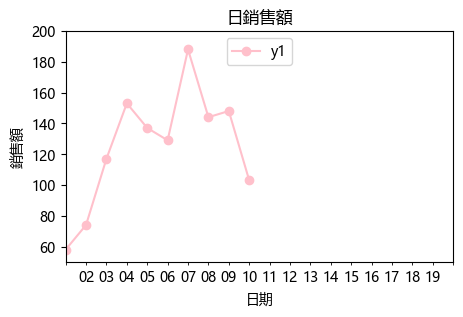

In [27]:
#figsize(寬,高) 單位是英寸
#marker: ^ v p(五邊形) s(正方形) o(實心圓形)
import matplotlib.pyplot as plt
import datetime as dt

plt.rcParams['font.family'] = 'Microsoft Yahei'
df.plot(x = 'date', y = 'y1', 
        figsize = (5,3), 
        marker = 'o',
        color = 'pink',
        xlabel = '日期',
        ylabel = '銷售額',
        title = '日銷售額',
        xlim = (dt.datetime(2020,1,1), dt.datetime(2020,1,20)),
        ylim = (50,200),
        xticks = range(10)
       ).legend(loc = 9)

In [30]:
np.array(df['date'].apply(lambda x:dt.datetime.strftime(x,'%Y/%m/%d')))

array(['2020/01/01', '2020/01/02', '2020/01/03', '2020/01/04',
       '2020/01/05', '2020/01/06', '2020/01/07', '2020/01/08',
       '2020/01/09', '2020/01/10'], dtype=object)

Python
#### 日期時間套件 datetime
    import datetime as dt
    1. 結構化時間
    2. 時間戳記
    3. 格式化時間：時間轉字串

In [35]:
import datetime as dt
#結構化時間
t = dt.datetime(2024,1,21,15,5,30,159)
print('年: ',t.year)
print('月: ',t.month)
print('日: ',t.day)
print('時: ',t.hour)
print('分: ',t.minute)
print('秒: ',t.second)
print('毫秒: ',t.microsecond)

年:  2024
月:  1
日:  21
時:  15
分:  5
秒:  30
毫秒:  159


In [37]:
#今天的日期
dt.datetime.today()

datetime.datetime(2024, 1, 21, 15, 9, 20, 893411)

In [38]:
#目前的時間
dt.datetime.now()

datetime.datetime(2024, 1, 21, 15, 9, 40, 818711)

In [40]:
#時間戳記
#日期時間轉成時間戳記
dt.datetime.now().timestamp()
int(dt.datetime.now().timestamp())

1705821085

In [41]:
#時間戳記轉成日期時間
t = dt.datetime.now().timestamp()
dt.datetime.fromtimestamp(t)

datetime.datetime(2024, 1, 21, 15, 12, 41, 75054)

In [43]:
#格式化時間：時間轉成字串
import datetime as dt
t = dt.datetime.now()
s = t.strftime('%Y/%m/%d %H:%M:%S.%f')
s

'2024/01/21 15:15:31.409395'

In [44]:
type(s)

str

In [45]:
#格式化時間：字串轉乘時間


In [47]:
t = dt.datetime.now()
#不能加年月，只有天、周
t + dt.timedelta(weeks = 1, days = 2, hours = 1, minutes = 30, seconds = 30)

datetime.datetime(2024, 1, 30, 16, 53, 2, 14662)

In [48]:
# 年跟月的部分需要新的套件
from dateutil.relativedelta import relativedelta
t + relativedelta(years = 1, months = 1)

datetime.datetime(2025, 2, 21, 15, 22, 32, 14662)

In [49]:
#從今天往前算一年，算出每個月第一天跟最後一天的時間，並格式化
import datetime as dt
from dateutil.relativedelta import relativedelta
base = dt.datetime.now() - relativedelta(years = 1)
base.replace(day = 1).strftime('%Y/%m/%d')

'2023/01/01'

In [51]:
(base.replace(day = 1)+relativedelta(months = 1) - relativedelta(days = 1)).strftime('%Y/%m/%d')

'2023/01/31'